In [2]:
import numpy as np
import pandas as pd
import numpy.linalg as la
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

***Problem 2 - Neural Data***

In [4]:
# Loading Data
# data = np.load("/Users/deancasey/Downloads/FilteredRecording.npy")
# data

In [7]:
data.shape

(54000403,)

In [16]:
max(data), min(data), np.mean(data)

(359.3718382561244, -326.5542036850869, -1.461053346948228e-06)

In [22]:
# threshold = 95 # Creating threshold of 95
# data_thresh = data >= threshold
# data_new = data[data_thresh] # filtering dataset by threshold

In [180]:
data_new_lst = []

cont_seg = []
for i, point in enumerate(data):
    if point >= 95:
        cont_seg.append(point)
    else:
        if len(cont_seg) > 1:
            data_new_lst.append(cont_seg)
        cont_seg = []
#data_new_lst

In [205]:
len(data_new_lst)

18319

In [206]:
# print(f" Original Data Minutes: {((len(data)/30000)/60):.2f}, Threshold Data Minutes: {(len(data_new)/30000)/60:.2f}")

In [207]:
# print(f" Original Data Seconds: {((len(data)/30000)):.2f}, Threshold Data Seconds: {(len(data_new)/30000):.2f}")

In [208]:
data_thresh

array([False, False, False, ..., False, False, False])

In [209]:
data_set = {item for sublist in data_new_lst for item in sublist}
len(data_set)

130687

In [1]:
matrix = np.empty((0,80), float)

for segment in data_new_lst:
    t_init = segment[0]
    index = np.where(data == t_init)[0][0]
    # print(index)
    new_array = data[index-40:index+40]
    matrix = np.append(matrix, np.array([new_array]), axis=0)

NameError: name 'np' is not defined

In [221]:
# matrix = np.empty((0,80), float)

# for i, val in enumerate(data):
#     if data_thresh[i] and val in data_set:
#         print(i)
#         new_array = data[i-40:i+40]
#         matrix = np.append(matrix, np.array([new_array]), axis=0)


In [222]:
matrix.shape

(18319, 80)

In [223]:
Z = matrix
Z[0].shape, len(Z)

((80,), 18319)

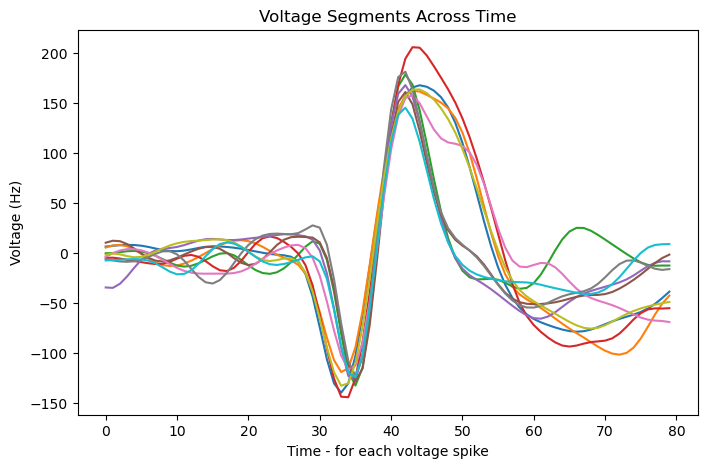

In [224]:
plt.figure(figsize=(8,5))

for i in range(10):
    rand = random.randint(0,len(Z))
    plt.plot(Z[rand])

# plt.plot(Z[0])
# plt.plot(Z[1])
# plt.plot(Z[2])
# plt.plot(Z[3])

# plt.plot(Z[-1])
# plt.plot(Z[-2])
# plt.plot(Z[-3])
# plt.plot(Z[-4])

plt.title("Voltage Segments Across Time")
plt.xlabel("Time - for each voltage spike")
plt.ylabel("Voltage (Hz)")
plt.show()

In [225]:
# plt.figure(figsize=(10,6))
# plt.plot(Z)
# plt.show()

In [227]:
Y = np.empty((0,50), float)

for i in range(len(Z)):
    row = Z[i,:]
    t_max = np.argmax(row)
    if t_max >= 25 and t_max <= 55:
        short_curve = Z[i,t_max-25:t_max+25]
        Y = np.append(Y, np.array([short_curve]), axis=0)
    
Y.shape

(18248, 50)

In [228]:
np.argmax(Z[0,:]), max(Z[0,:])

(42, 185.36543246733282)

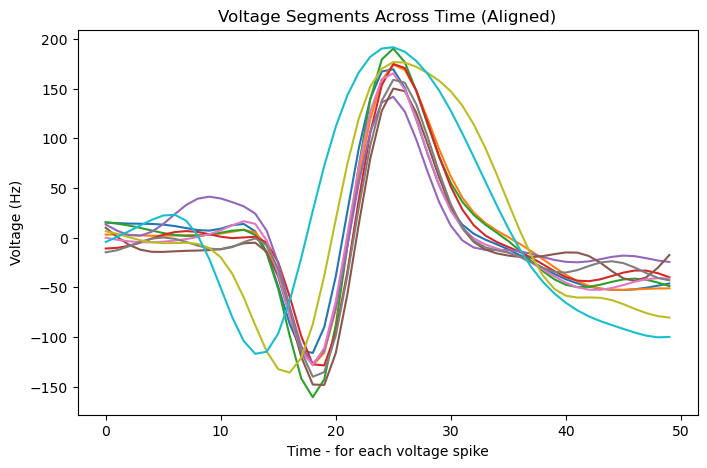

In [229]:
plt.figure(figsize=(8,5))

for i in range(10):
    rand = random.randint(0,len(Y))
    plt.plot(Y[rand])

plt.title("Voltage Segments Across Time (Aligned)")
plt.xlabel("Time - for each voltage spike")
plt.ylabel("Voltage (Hz)")
plt.show()

In [230]:
k2 = 2
k3 = 3
k4 = 4

model2 = KMeans(n_clusters=k2, max_iter=500)
model3 = KMeans(n_clusters=k3, max_iter=500)
model4 = KMeans(n_clusters=k4, max_iter=500)

clusters2 = model2.fit(Y)
clusters3 = model3.fit(Y)
clusters4 = model4.fit(Y)

In [231]:
clusters2.cluster_centers_.shape

(2, 50)

In [232]:
clusters2.labels_

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [233]:
np.unique(clusters2.labels_)

array([0, 1], dtype=int32)

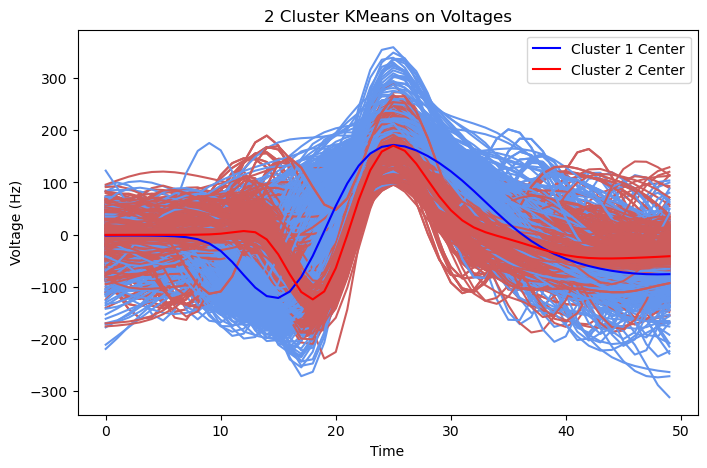

In [234]:
plt.figure(figsize = (8,5))

for ind, point in enumerate(Y):
    if clusters2.labels_[ind] == 0:
        plt.plot(point, c='cornflowerblue')
    else:
        plt.plot(point, c='indianred')
        
plt.plot(clusters2.cluster_centers_[0],c='blue',label='Cluster 1 Center')
plt.plot(clusters2.cluster_centers_[1],c='red',label='Cluster 2 Center')

plt.title("2 Cluster KMeans on Voltages")
plt.xlabel("Time")
plt.ylabel("Voltage (Hz)")
plt.legend()
plt.show()

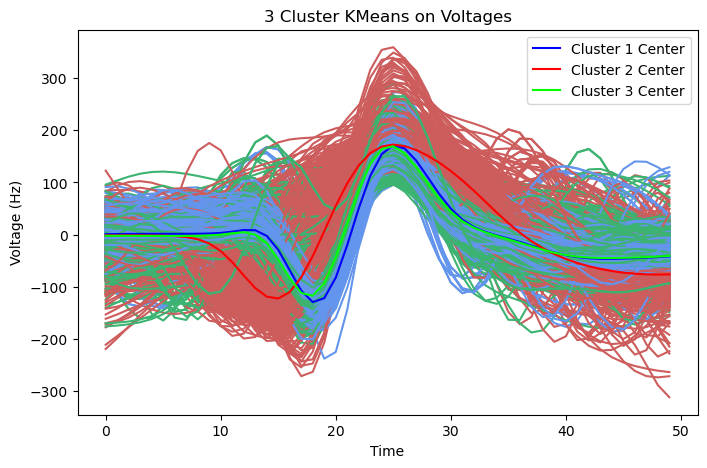

In [237]:
plt.figure(figsize = (8,5))

for ind, point in enumerate(Y):
    if clusters3.labels_[ind] == 0:
        plt.plot(point, c='cornflowerblue')
    elif clusters3.labels_[ind] == 1:
        plt.plot(point, c='indianred')
    else:
        plt.plot(point, c='mediumseagreen')
        
plt.plot(clusters3.cluster_centers_[0],c='blue',label='Cluster 1 Center')
plt.plot(clusters3.cluster_centers_[1],c='red',label='Cluster 2 Center')
plt.plot(clusters3.cluster_centers_[2],c='lime',label='Cluster 3 Center')

plt.title("3 Cluster KMeans on Voltages")
plt.xlabel("Time")
plt.ylabel("Voltage (Hz)")
plt.legend()
plt.show()

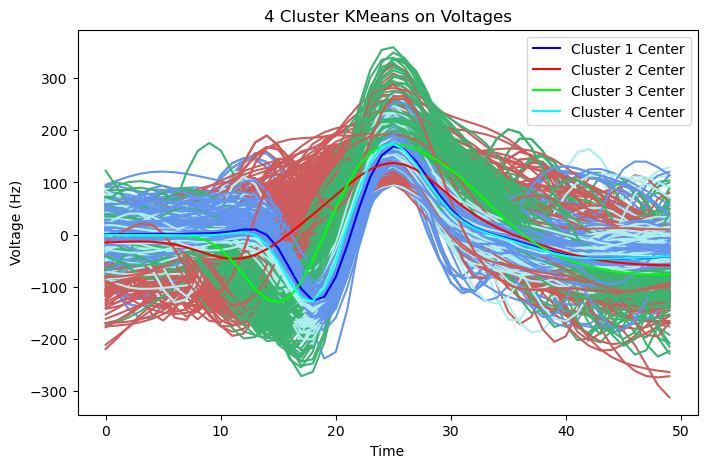

In [238]:
plt.figure(figsize = (8,5))

for ind, point in enumerate(Y):
    if clusters4.labels_[ind] == 0:
        plt.plot(point, c='cornflowerblue')
    elif clusters4.labels_[ind] == 1:
        plt.plot(point, c='indianred')
    elif clusters4.labels_[ind] == 2:
        plt.plot(point, c='mediumseagreen')
    else:
        plt.plot(point, c= 'paleturquoise')

plt.plot(clusters4.cluster_centers_[0],c='blue',label='Cluster 1 Center')
plt.plot(clusters4.cluster_centers_[1],c='red',label='Cluster 2 Center')
plt.plot(clusters4.cluster_centers_[2],c='lime',label='Cluster 3 Center')
plt.plot(clusters4.cluster_centers_[3],c='cyan',label='Cluster 4 Center')

plt.title("4 Cluster KMeans on Voltages")
plt.xlabel("Time")
plt.ylabel("Voltage (Hz)")
plt.legend()
plt.show()

In [246]:
Y_tilda = np.zeros((Y.T.shape))
for j, col in enumerate(Y.T):
    Y_bar = np.mean(col)
    Y_tilda[j] = col - Y_bar

Y_tilda = Y_tilda.T
Y_tilda.shape

(18248, 50)

In [248]:
S = Y_tilda.T@Y_tilda
S.shape

(50, 50)

In [336]:
eigenvalues, eigenvectors = la.eig(S)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

In [263]:
eig2 = eigenvectors[:2]
eig2.shape

(2, 50)

In [264]:
Y_tilda.shape

(18248, 50)

In [266]:
pca2 = np.dot(Y,eig2.T) # Projecting data onto first 2 principle component vectors
pca2.shape

(18248, 2)

In [271]:
pca2

array([[  21.73591025,   -8.22358523],
       [  24.87825717,  -15.71902548],
       [  91.4288019 ,  -30.19039174],
       ...,
       [-104.66157223,   28.49139624],
       [-104.66157223,   28.49139624],
       [  32.7420383 ,  -15.25490938]])

Plotting 2 component PCA onto scatterplot:

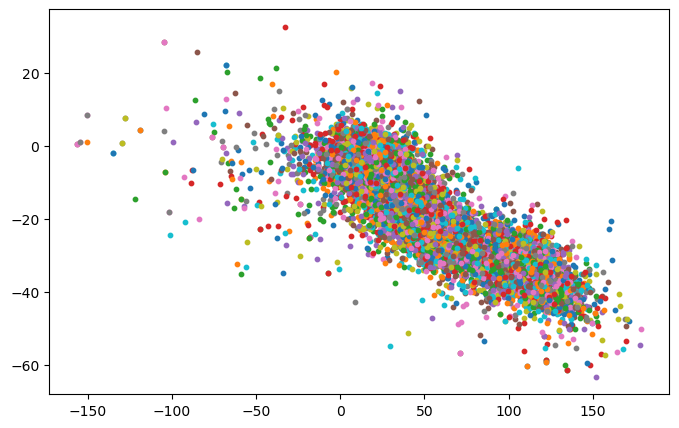

In [277]:
plt.figure(figsize=(8,5))

for point in pca2:
    plt.scatter(point[0],point[1],s=10)

plt.show()

In [284]:
pca_model2 = KMeans(n_clusters=k2, max_iter=500)
pca_model3 = KMeans(n_clusters=k3, max_iter=500)
pca_model4 = KMeans(n_clusters=k4, max_iter=500)

pca_model2.fit(pca2)
pca_model3.fit(pca2)
pca_model4.fit(pca2)

KMeans(max_iter=500, n_clusters=4)

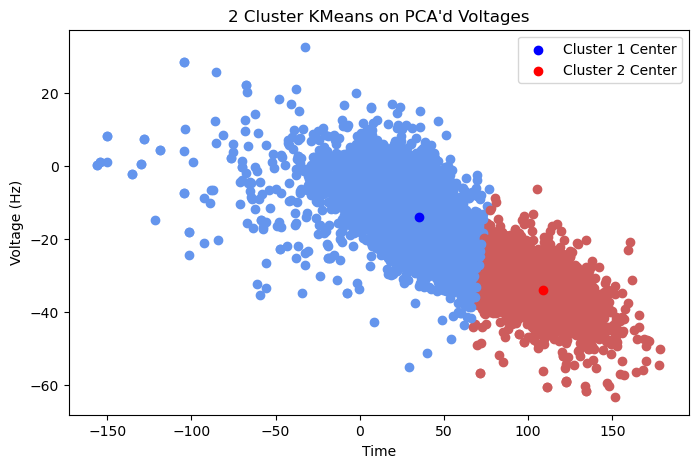

In [286]:
plt.figure(figsize = (8,5))

for ind, point in enumerate(pca2):
    #print(ind)
    if pca_model2.labels_[ind] == 0:
        plt.scatter(point[0],point[1], c='cornflowerblue')
    else:
        plt.scatter(point[0],point[1], c='indianred')
        
plt.scatter(pca_model2.cluster_centers_[0][0],pca_model2.cluster_centers_[0][1]
            ,c='blue',label='Cluster 1 Center')
plt.scatter(pca_model2.cluster_centers_[1][0],pca_model2.cluster_centers_[1][1]
            ,c='red',label='Cluster 2 Center')

plt.title("2 Cluster KMeans on PCA'd Voltages")
plt.xlabel("Time")
plt.ylabel("Voltage (Hz)")
plt.legend()
plt.show()

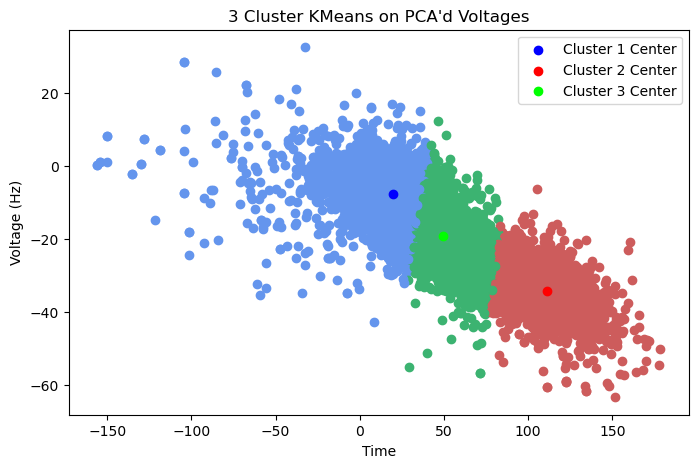

In [287]:
plt.figure(figsize = (8,5))

for ind, point in enumerate(pca2):
    if pca_model3.labels_[ind] == 0:
        plt.scatter(point[0],point[1], c='cornflowerblue')
    elif pca_model3.labels_[ind] == 1:
        plt.scatter(point[0],point[1], c='indianred')
    else:
        plt.scatter(point[0],point[1], c='mediumseagreen')

        
plt.scatter(pca_model3.cluster_centers_[0][0],pca_model3.cluster_centers_[0][1]
            ,c='blue',label='Cluster 1 Center')
plt.scatter(pca_model3.cluster_centers_[1][0],pca_model3.cluster_centers_[1][1]
            ,c='red',label='Cluster 2 Center')
plt.scatter(pca_model3.cluster_centers_[2][0],pca_model3.cluster_centers_[2][1]
            ,c='lime',label='Cluster 3 Center')

plt.title("3 Cluster KMeans on PCA'd Voltages")
plt.xlabel("Time")
plt.ylabel("Voltage (Hz)")
plt.legend()
plt.show()

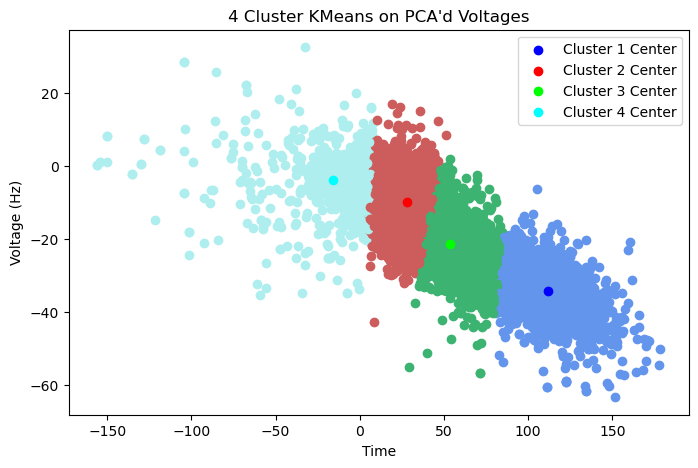

In [288]:
plt.figure(figsize = (8,5))

for ind, point in enumerate(pca2):
    if pca_model4.labels_[ind] == 0:
        plt.scatter(point[0],point[1], c='cornflowerblue')
    elif pca_model4.labels_[ind] == 1:
        plt.scatter(point[0],point[1], c='indianred')
    elif pca_model4.labels_[ind] == 2:
        plt.scatter(point[0],point[1], c='mediumseagreen')
    else:
        plt.scatter(point[0],point[1], c='paleturquoise')

        
plt.scatter(pca_model4.cluster_centers_[0][0],pca_model4.cluster_centers_[0][1]
            ,c='blue',label='Cluster 1 Center')
plt.scatter(pca_model4.cluster_centers_[1][0],pca_model4.cluster_centers_[1][1]
            ,c='red',label='Cluster 2 Center')
plt.scatter(pca_model4.cluster_centers_[2][0],pca_model4.cluster_centers_[2][1]
            ,c='lime',label='Cluster 3 Center')
plt.scatter(pca_model4.cluster_centers_[3][0],pca_model4.cluster_centers_[3][1]
            ,c='cyan',label='Cluster 4 Center')

plt.title("4 Cluster KMeans on PCA'd Voltages")
plt.xlabel("Time")
plt.ylabel("Voltage (Hz)")
plt.legend()
plt.show()

In [313]:
pca_2clusters1 = np.array([Y[ind] for ind, point in enumerate(Y) if pca_model2.labels_[ind] == 0])
pca_2clusters2 = np.array([Y[ind] for ind, point in enumerate(Y) if pca_model2.labels_[ind] == 1])

mean_pca_curve1 = np.mean(pca_2clusters1,axis=0)
mean_pca_curve2 = np.mean(pca_2clusters2,axis=0)

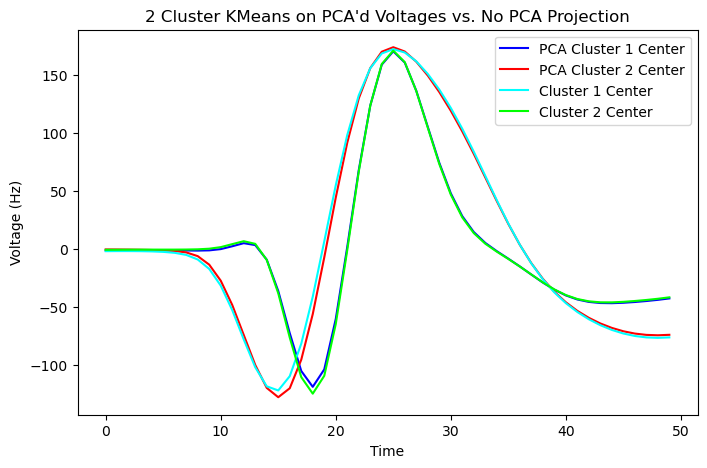

In [323]:
plt.figure(figsize = (8,5))
        
plt.plot(mean_pca_curve1,c='blue',label='PCA Cluster 1 Center')
plt.plot(mean_pca_curve2,c='red',label='PCA Cluster 2 Center')

plt.plot(clusters2.cluster_centers_[0],c='cyan',label='Cluster 1 Center')
plt.plot(clusters2.cluster_centers_[1],c='lime',label='Cluster 2 Center')

plt.title("2 Cluster KMeans on PCA'd Voltages vs. No PCA Projection")
plt.xlabel("Time")
plt.ylabel("Voltage (Hz)")
plt.legend()
plt.show()

The 2 clusters for regular KMeans and the KMeans on the PCA-projected data are actually very similar, as shown by the almost overlapping curves.

In [326]:
pca_3clusters1 = np.array([Y[ind] for ind, point in enumerate(Y) if pca_model3.labels_[ind] == 0])
pca_3clusters2 = np.array([Y[ind] for ind, point in enumerate(Y) if pca_model3.labels_[ind] == 1])
pca_3clusters3 = np.array([Y[ind] for ind, point in enumerate(Y) if pca_model3.labels_[ind] == 2])

mean_pca3_curve1 = np.mean(pca_3clusters1,axis=0)
mean_pca3_curve2 = np.mean(pca_3clusters2,axis=0)
mean_pca3_curve3 = np.mean(pca_3clusters3,axis=0)

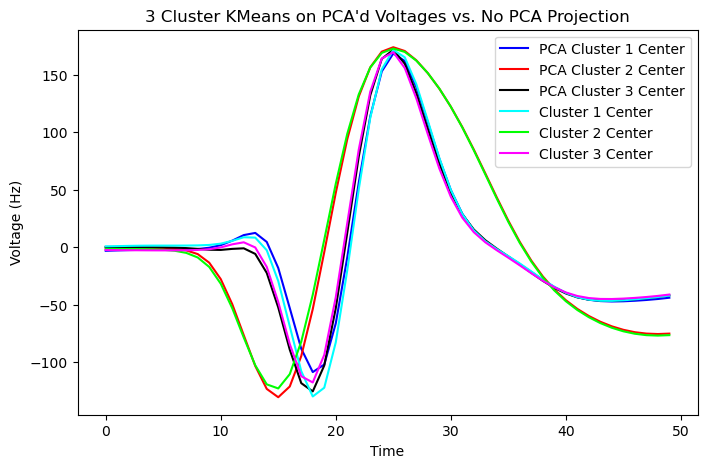

In [332]:
plt.figure(figsize = (8,5))
        
plt.plot(mean_pca3_curve1,c='blue',label='PCA Cluster 1 Center')
plt.plot(mean_pca3_curve2,c='red',label='PCA Cluster 2 Center')
plt.plot(mean_pca3_curve3,c='black',label='PCA Cluster 3 Center')


plt.plot(clusters3.cluster_centers_[0],c='cyan',label='Cluster 1 Center')
plt.plot(clusters3.cluster_centers_[1],c='lime',label='Cluster 2 Center')
plt.plot(clusters3.cluster_centers_[2],c='magenta',label='Cluster 3 Center')


plt.title("3 Cluster KMeans on PCA'd Voltages vs. No PCA Projection")
plt.xlabel("Time")
plt.ylabel("Voltage (Hz)")
plt.legend()
plt.show()

Again, the clusters actually look extremely similar for the PCA and the raw clustering methods.

In [329]:
pca_4clusters1 = np.array([Y[ind] for ind, point in enumerate(Y) if pca_model4.labels_[ind] == 0])
pca_4clusters2 = np.array([Y[ind] for ind, point in enumerate(Y) if pca_model4.labels_[ind] == 1])
pca_4clusters3 = np.array([Y[ind] for ind, point in enumerate(Y) if pca_model4.labels_[ind] == 2])
pca_4clusters4 = np.array([Y[ind] for ind, point in enumerate(Y) if pca_model4.labels_[ind] == 3])

mean_pca4_curve1 = np.mean(pca_4clusters1,axis=0)
mean_pca4_curve2 = np.mean(pca_4clusters2,axis=0)
mean_pca4_curve3 = np.mean(pca_4clusters3,axis=0)
mean_pca4_curve4 = np.mean(pca_4clusters4,axis=0)

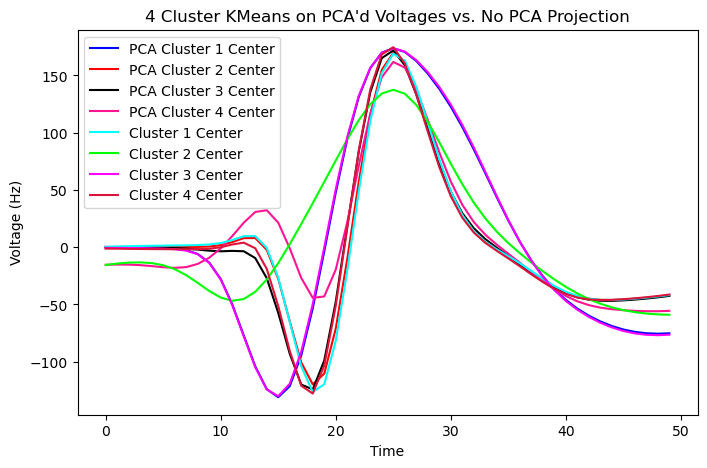

In [330]:
plt.figure(figsize = (8,5))
        
plt.plot(mean_pca4_curve1,c='blue',label='PCA Cluster 1 Center')
plt.plot(mean_pca4_curve2,c='red',label='PCA Cluster 2 Center')
plt.plot(mean_pca4_curve3,c='black',label='PCA Cluster 3 Center')
plt.plot(mean_pca4_curve4,c='deeppink',label='PCA Cluster 4 Center')


plt.plot(clusters4.cluster_centers_[0],c='cyan',label='Cluster 1 Center')
plt.plot(clusters4.cluster_centers_[1],c='lime',label='Cluster 2 Center')
plt.plot(clusters4.cluster_centers_[2],c='magenta',label='Cluster 3 Center')
plt.plot(clusters4.cluster_centers_[3],c='crimson',label='Cluster 4 Center')


plt.title("4 Cluster KMeans on PCA'd Voltages vs. No PCA Projection")
plt.xlabel("Time")
plt.ylabel("Voltage (Hz)")
plt.legend()
plt.show()

With 4 clusters, we start to see more divergence between the PCA clusters and the raw clustering.

***Problem 3 - Handwritten Digits***

In [5]:
mnist_data = np.load('/Users/deancasey/Downloads/MNIST_data.npy')
mnist_labels = np.load('/Users/deancasey/Downloads/MNIST_labels.npy')

In [6]:
mnist_data.shape, mnist_labels.shape

((70000, 784), (70000,))

In [7]:
np.unique(mnist_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
mnist_data = mnist_data/255

In [9]:
mnist_data[0].shape

(784,)

In [10]:
examples = np.empty((20,784), float)

for i in range(20):
    rand = random.randint(0,len(mnist_data))
    examples[i] = mnist_data[rand]
examples.shape

(20, 784)

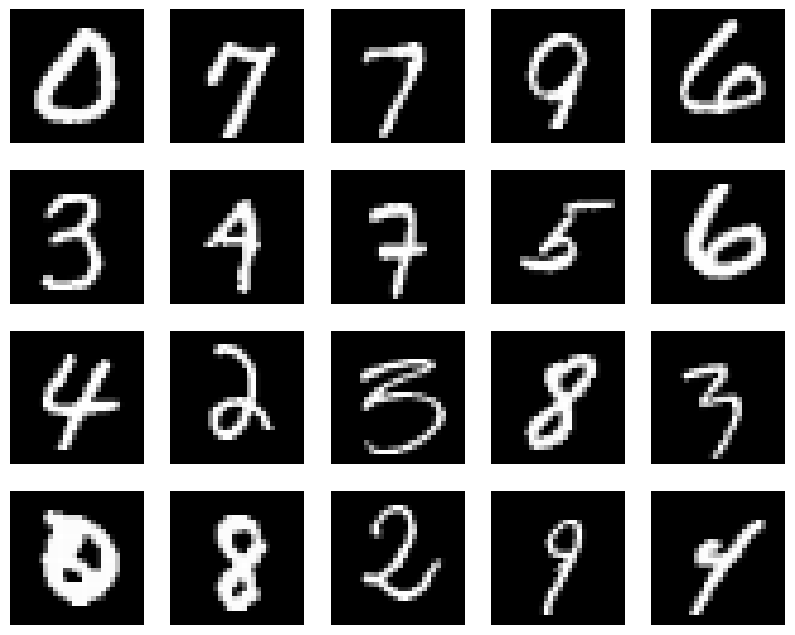

In [11]:
%matplotlib inline

nrows = 4;ncols = 5
plt.figure(figsize=(ncols*2, nrows*2))

for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(examples[i].reshape((28,28)), cmap='gray')
    plt.axis('off')
    
plt.show()

In [12]:
mnist_data.T.shape

(784, 70000)

In [13]:
X_tilda = np.zeros((mnist_data.T.shape))
for j, col in enumerate(mnist_data.T):
    X_bar = np.mean(col)
    X_tilda[j] = col - X_bar

X_tilda = X_tilda.T
X_tilda.shape

(70000, 784)

In [14]:
samp_cov = (X_tilda.T@X_tilda)/(X_tilda.shape[0])
samp_cov.shape

(784, 784)

In [15]:
import scipy
X_eigenvalues, X_eigenvectors = scipy.linalg.eigh(samp_cov)
X_eigenvectors = X_eigenvectors[:,::-1]
X_eigenvalues = X_eigenvalues[::-1]
# X_eigenvalues

In [16]:
X_eigenvectors.shape

(784, 784)

In [17]:
# top_10_eig = X_eigenvectors[:,range(-1,-10-1,-1)]
top_10_eig = X_eigenvectors[:,:10]

In [18]:
len(np.unique(top_10_eig))

7265

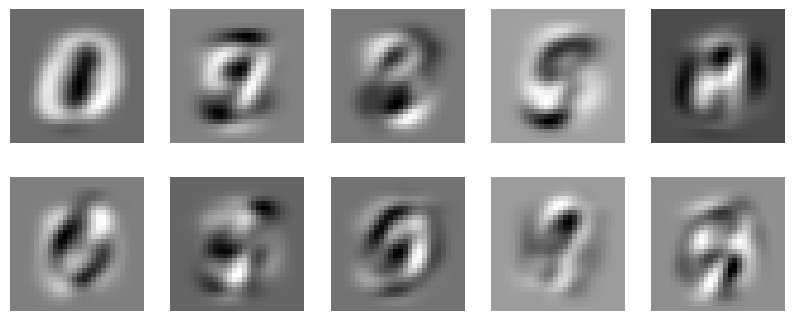

In [19]:
%matplotlib inline

nrows = 2;ncols = 5
plt.figure(figsize=(ncols*2, nrows*2))

for i in range(nrows*ncols):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(top_10_eig[:,i].reshape((28,28)), cmap='gray')
    plt.axis('off')
    
plt.show()

In [20]:
X_eigenvalues.shape

(784,)

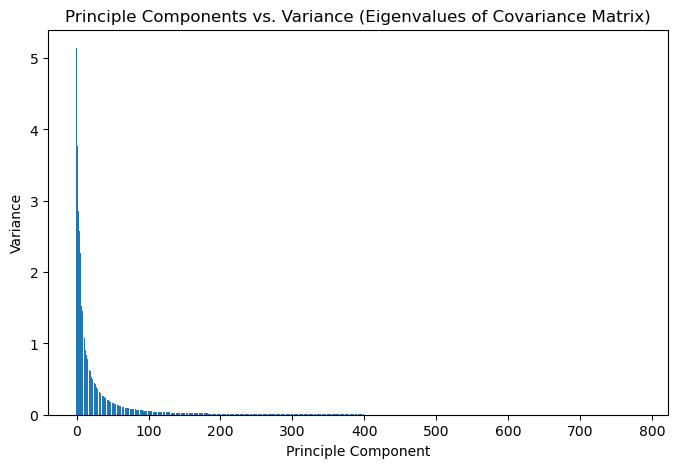

In [102]:
pc_indices = np.arange(len(X_eigenvectors))
plt.figure(figsize=(8,5))

# plt.plot(pc_indices[:100],X_eigenvalues[:100])
plt.bar(pc_indices,X_eigenvalues)


plt.title('Principle Components vs. Variance (Eigenvalues of Covariance Matrix)')
plt.xlabel('Principle Component')
plt.ylabel('Variance')
plt.show()

In [22]:
mnist_data.shape

(70000, 784)

In [23]:
m = [2,5,10,25,50]
index = 30000

In [24]:
def dim_reduc_plot(original_data,index,m,eigenvectors):
    test_point = original_data[index] - np.mean(original_data, axis=0)
    
    plt.figure(figsize=(10,6))
    cols = len(m) + 1

    plt.subplot(1, cols,1)
    plt.imshow(original_data[index].reshape((28,28)),cmap='gray')
    plt.axis('off')
    plt.title('Original Image')


    for i, val in enumerate(m):
        top_m_pcs = eigenvectors[:,:val]
        project_test = np.dot(test_point,top_m_pcs)
        transf_test = np.dot(project_test,top_m_pcs.T)
        transf_test = transf_test + np.mean(original_data,axis=0)

        plt.subplot(1, cols,i+2)
        plt.imshow(transf_test.reshape((28,28)), cmap='gray')
        plt.axis('off')
        plt.title(f"m = {val}")
    
    plt.show()

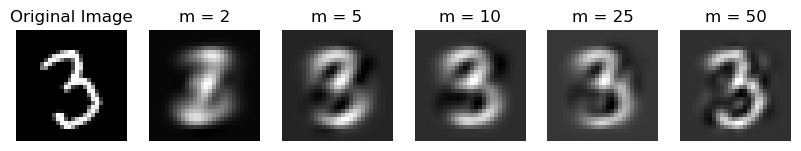

In [25]:
dim_reduc_plot(mnist_data,index,m,X_eigenvectors)

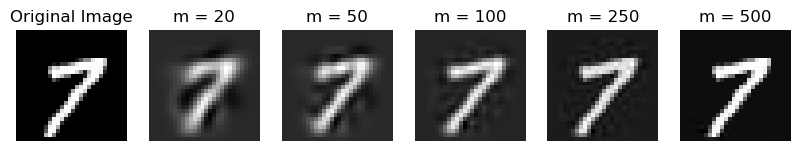

In [26]:
index1 = random.randint(0,len(mnist_data))
m10 = [20,50,100,250,500]
dim_reduc_plot(mnist_data,index1,m10,X_eigenvectors)

Different digits seem to require varying numbers of principle components to "accurately" depict itself. There does seem to be a certain threshold, where once you get enough principle components out of the total 784, there doesn't seem to be much deviation from the original image, no matter the digit. As shown from the 2 above examples, the level of m can greatly impact the results. m = 2, for example, struggles to capture the essence of the digit for many different digits, although some digits are easier to make out than others. The top m principal components are capturing the directions/vectors that correspond to the top m levels of variance. So for all of the data in the digits dataset, the components that result in the highest amount of variance are captured by the top principle components, and we thus intuit as the most "important" parts of the data.

In [27]:
mnist_data.shape

(70000, 784)

In [28]:
mnist_kmeans10 = KMeans(n_clusters=10, max_iter=500).fit(mnist_data)

In [29]:
np.unique(mnist_kmeans10.cluster_centers_)

array([-5.68989300e-16, -3.40005801e-16, -2.86229374e-16, ...,
        8.57429288e-01,  8.60195745e-01,  8.66332982e-01])

In [30]:
mnist_kmeans10.cluster_centers_.shape

(10, 784)

In [31]:
mnist_kmeans10.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [690]:
mnist_kmeans10.labels_

array([6, 5, 1, ..., 0, 8, 8], dtype=int32)

In [66]:
clusters = {}
for i in range(0,10):
    clusters[i] = np.empty((0,784), float)
clusters

{0: array([], shape=(0, 784), dtype=float64),
 1: array([], shape=(0, 784), dtype=float64),
 2: array([], shape=(0, 784), dtype=float64),
 3: array([], shape=(0, 784), dtype=float64),
 4: array([], shape=(0, 784), dtype=float64),
 5: array([], shape=(0, 784), dtype=float64),
 6: array([], shape=(0, 784), dtype=float64),
 7: array([], shape=(0, 784), dtype=float64),
 8: array([], shape=(0, 784), dtype=float64),
 9: array([], shape=(0, 784), dtype=float64)}

In [65]:
mnist_data[0].shape

(784,)

In [67]:
for ind, point in enumerate(mnist_data):
    label = mnist_kmeans10.labels_[ind]
    clusters[label] = np.vstack([clusters[label], point.reshape(1,-1)])
    print(ind)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [68]:
clusters.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
len(clusters[0]), len(clusters[1])

(8941, 12103)

In [70]:
len(clusters)

10

In [71]:
clusters[0].shape

(8941, 784)

In [100]:
def cluster_digits_plot(nrows,cols,cluster_data,cluster_num):
    plt.figure(figsize=(ncols*2, nrows*2))
    
    for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        ind = random.randint(0,9)
        plt.imshow(cluster_data[cluster_num][ind].reshape((28,28)), cmap='gray')
        plt.axis('off')
        plt.title(f"Cluster {cluster_num}")
    plt.show()

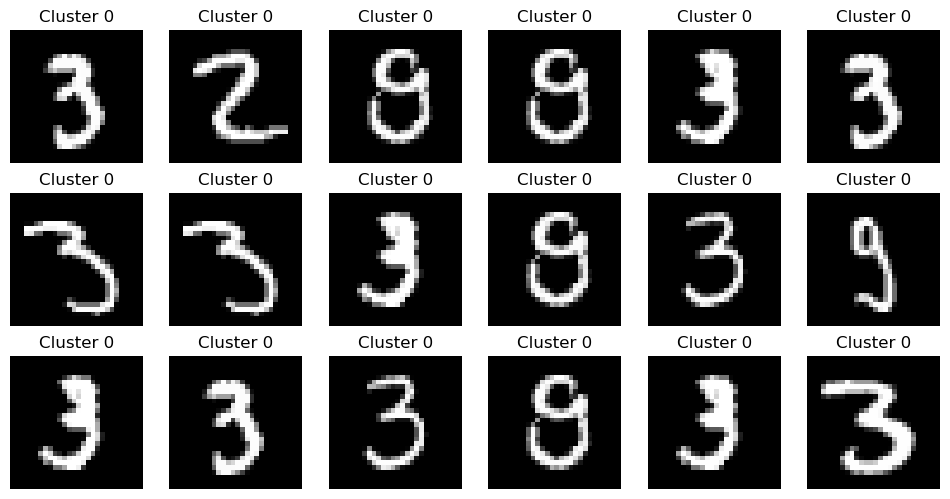

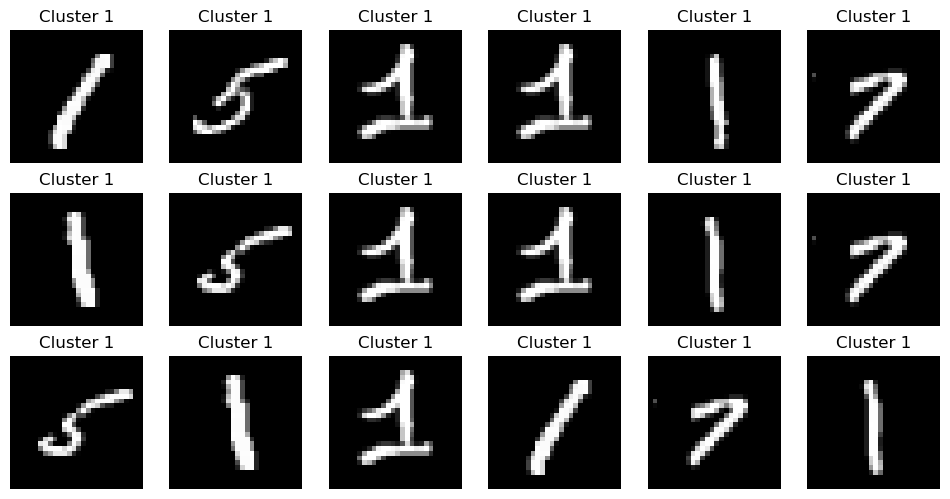

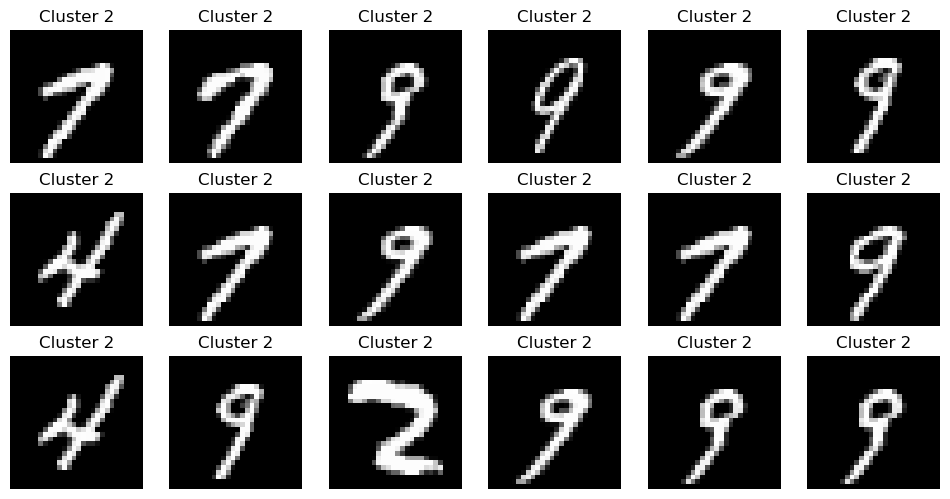

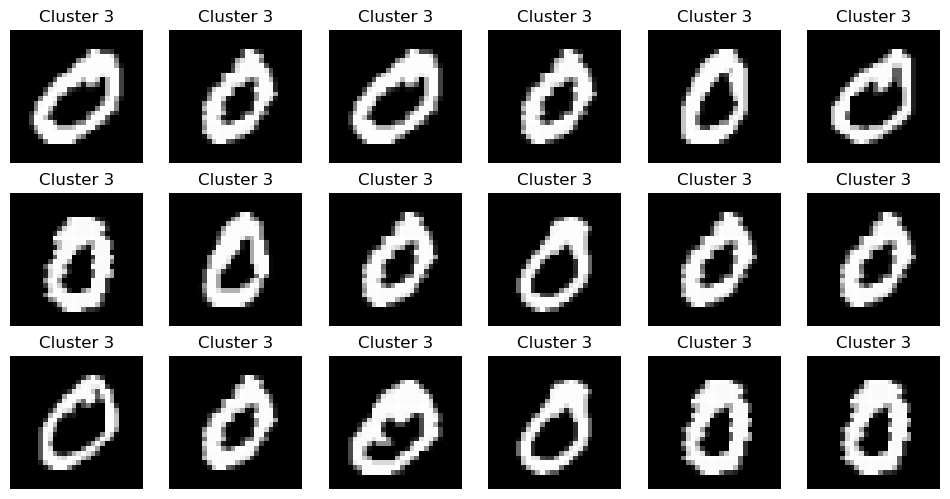

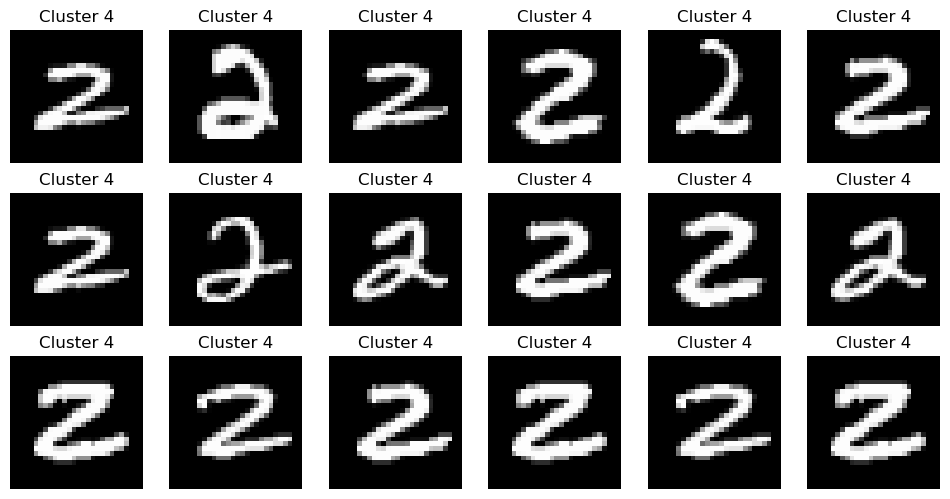

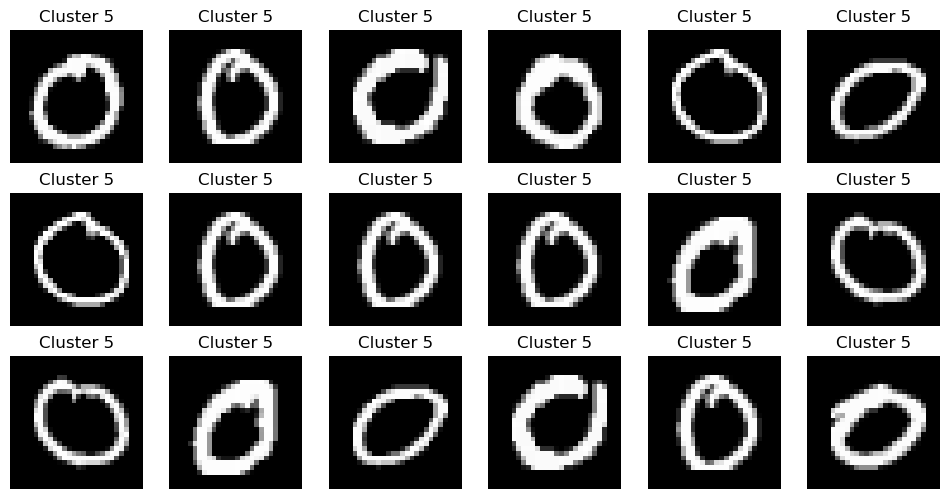

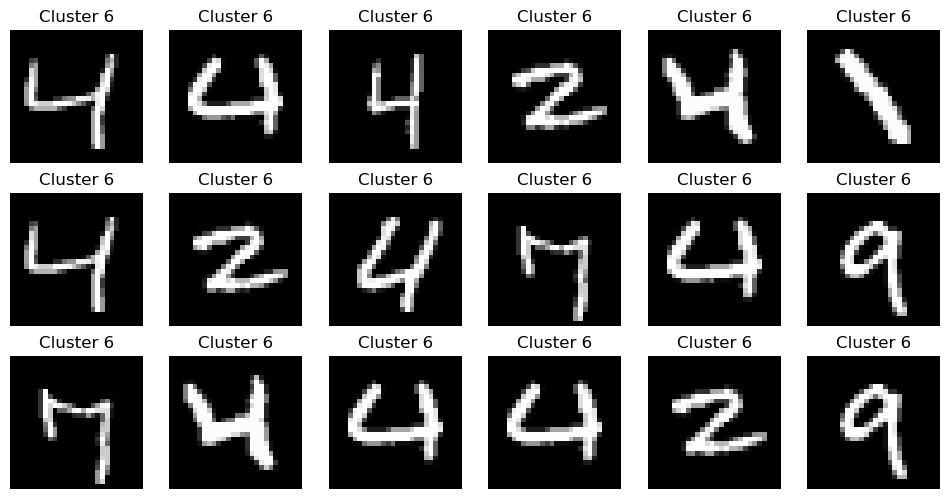

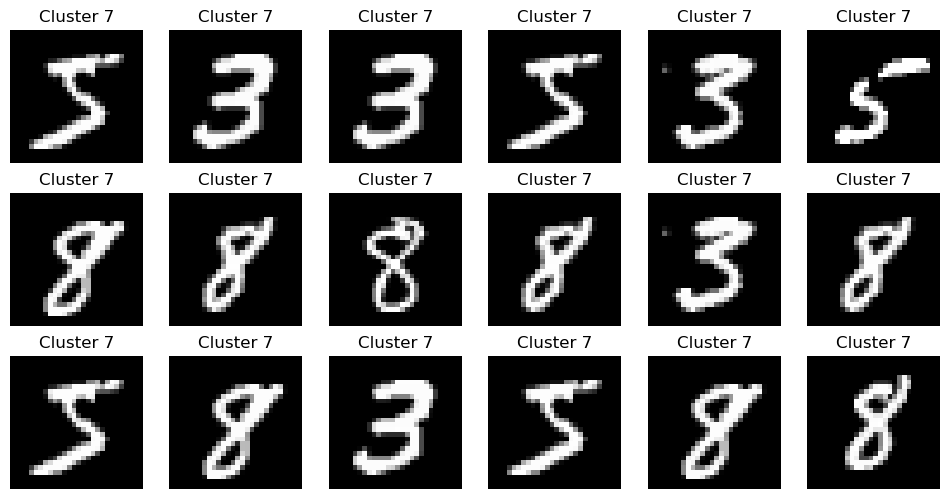

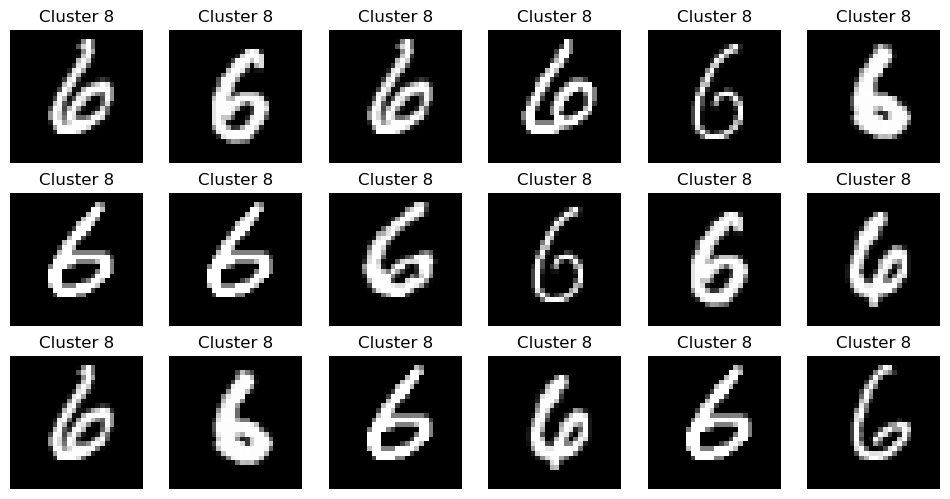

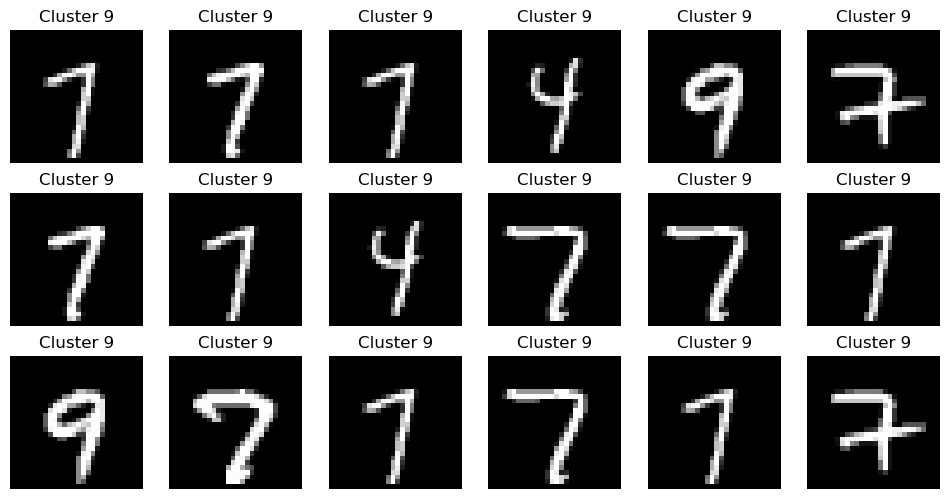

In [101]:
for label in clusters.keys():
    cluster_digits_plot(3,6,clusters,label)


For certain digits, the clusters actually capture the structure of the data very well, as shown by the same handwritten digits in the same clusters. Some clusters don't do as well, with quite peculiar results. Certain clusters have all of the same digits together (at least with the sampled data), and some clusters have obviously wrong classifications.

In [106]:
binary_data = np.empty(mnist_data.shape)
tau = 0.5

for i, row in enumerate(mnist_data):
    for j, point in enumerate(row):
        if point >= tau:
            binary_data[i,j] = 1
        else:
            binary_data[i,j] = 0

binary_data.shape

(70000, 784)

In [188]:
epsilon = 1e-10

In [228]:
def func_m(m, p, Xi):
    p_clipped = np.clip(p[m], epsilon, 1-epsilon)
    
    log_likelihood = Xi * np.log(p_clipped) + (1-Xi) * np.log(1-p_clipped)
    total_ll = np.sum(log_likelihood)
    return np.exp(total_ll)

In [229]:
M = 10
pi = np.ones(M)/M
p = np.ones((N,M))/2

In [230]:
N = len(binary_data)
w = np.random.rand(N, M)

w = w / w.sum(axis=1, keepdims=True)

In [231]:
def loss(pi, p, X, M):
    loss = 0
    for i in range(N):
        val = 0
        for m in range(M):
            val += pi[m] * func_m(m, p[m] ,X[i]) #- lambda_ * pi
        loss += np.log(val+epsilon)
    return loss

In [233]:
def pi_k_new_update(n, w, k):
    wk = 0
    for i in range(n):
        wk += w[i,k]
    return (1/n)*wk

In [234]:
def p_k_new_update(k,w,X):
    n,d = X.shape
    numerator = np.zeros(d)
    denominator = 0
    
    for i in range(n):
        numerator += (X[i])*w[i,k]
        denominator += w[i,k]
    return (numerator+1)/(denominator+2)

In [235]:
def wik_update(k, pi, Xi, M):
    numerator = pi[k] * func_m(k, p, Xi)
    denominator = 0
    for m in range(M):
        denominator += pi[m] * func_m(M, p, Xi)
    return (numerator+1)/(denominator+2)

In [236]:
threshold = 1e-6
max_iter = 10
initial_loss = loss(pi, p, binary_data, M)
initial_loss

-1611809.565097043

In [238]:
binary_data.shape, w.shape, p_k_new_update(1,w,binary_data).shape, p.shape

((70000, 784), (70000, 10), (784,), (10, 784))

In [239]:
def e_step(X, pi, p, M):
    N = X.shape[0]
    w_new = np.zeros((N, M))
    for i in range(N):
        for m in range(M):
            w_new[i, m] = pi[m] * func_m(m, p, X[i])
        w_new[i, :] /= w_new[i, :].sum()
    return w_new

In [240]:
def m_step(X, w):
    N, d = X.shape
    M = w.shape[1]
    pi_new = np.sum(w, axis=0) / N
    p_new = np.zeros((M, d))
    for m in range(M):
        for j in range(d):
            p_new[m, j] = (np.dot(w[:, m], X[:, j]) + 1) / (np.sum(w[:, m]) + 2)
    return pi_new, p_new


In [241]:
def compute_log_likelihood(X, pi, p, M):
    N = X.shape[0]
    log_likelihood = 0
    for i in range(N):
        temp_sum = 0
        for m in range(M):
            temp_sum += pi[m] * func_m(m, p, X[i])
        log_likelihood += np.log(temp_sum)
    return log_likelihood

In [243]:
# Initialization
M = 10
N,d = binary_data.shape
pi = np.ones(M)/M
p = np.ones((M,d))/2
w = np.random.rand(N, M)
w = w / w.sum(axis=1, keepdims=True)

log_likelihood = -np.inf
tolerance = 1e-6
max_iterations = 50
iterations = 0

while iterations < max_iterations:
    iterations += 1
    print(iterations)
    
    # E-step
    w = e_step(binary_data, pi, p, M)
    
    # M-step
    pi, p = m_step(binary_data, w)
    
    # Compute log likelihood and check for convergence
    current_log_likelihood = compute_log_likelihood(binary_data, pi, p, M)
    if np.abs(current_log_likelihood - log_likelihood) < tolerance:
        print("Converged at iteration:", iterations)
        break
    log_likelihood = current_log_likelihood

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [244]:
log_likelihood

-13152208.42500315

In [247]:
pi

array([0.32546   , 0.29093422, 0.38360579, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [251]:
p.shape

(10, 784)

In [257]:
nrows*ncols

10

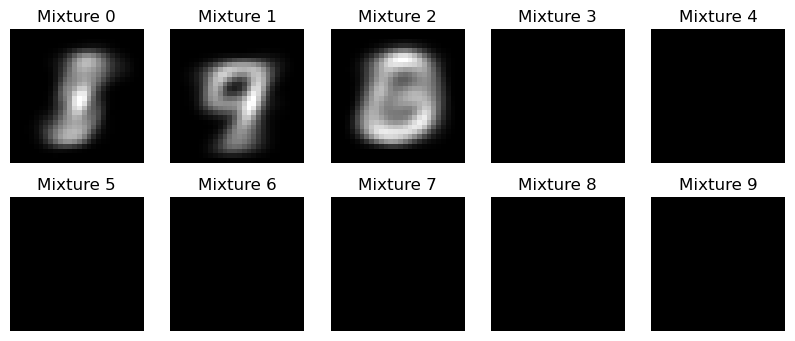

In [256]:
nrows = 2
ncols = 5
plt.figure(figsize=(ncols*2, nrows*2))

for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(p[i].reshape((28,28)), cmap='gray')
        plt.axis('off')
        plt.title(f"Mixture {i}")
plt.show()


In [262]:
# Initialization
M = 20
N,d = binary_data.shape
pi = np.ones(M)/M
p = np.ones((M,d))/2
w = np.random.rand(N, M)
w = w / w.sum(axis=1, keepdims=True)

log_likelihood = -np.inf
tolerance = 1e-6
max_iterations = 50
iterations = 0

while iterations < max_iterations:
    iterations += 1
    print(iterations)
    
    # E-step
    w = e_step(binary_data, pi, p, M)
    
    # M-step
    pi, p = m_step(binary_data, w)
    
    # Compute log likelihood and check for convergence
    current_log_likelihood = compute_log_likelihood(binary_data, pi, p, M)
    if np.abs(current_log_likelihood - log_likelihood) < tolerance:
        print("Converged at iteration:", iterations)
        break
    log_likelihood = current_log_likelihood

1
2
Converged at iteration: 2


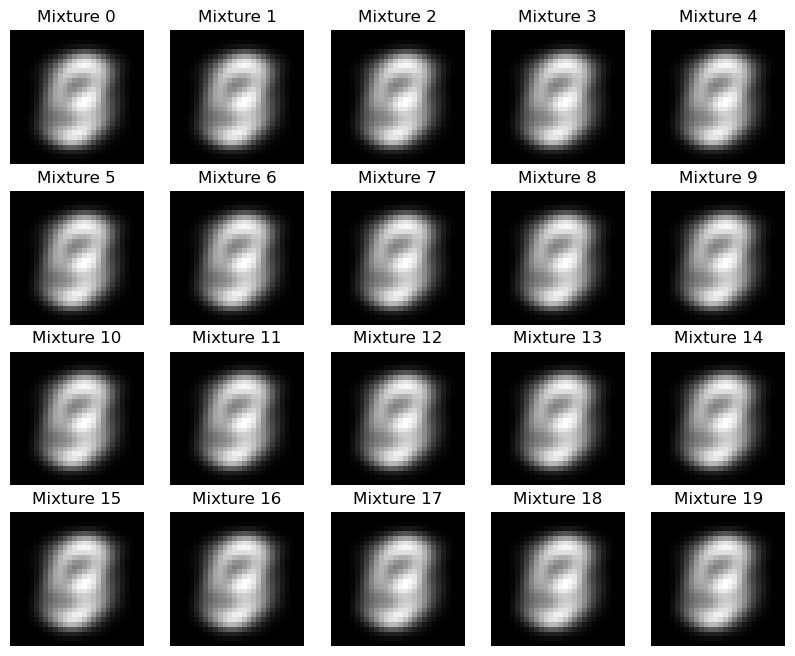

In [263]:
nrows = 4
ncols = 5
plt.figure(figsize=(ncols*2, nrows*2))

for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(p[i].reshape((28,28)), cmap='gray')
        plt.axis('off')
        plt.title(f"Mixture {i}")
plt.show()
